In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
print(tf.__version__)

1.2.1


In [3]:
import basic_keras_tf as b

# Load Up Trained Model

In [4]:
m = b.TSModel(b.lstm_timesteps, b.lstm_batchsize)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 1)           264       
_________________________________________________________________
reshape_1 (Reshape)          (None, 100, 1)            0         
Total params: 17,160
Trainable params: 17,160
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
m.m.load_weights('tf_keras_redux.h5')

# Test Some Predictions

In [6]:
from singen import SinGen

In [7]:
g = SinGen(timesteps=b.lstm_timesteps)

In [8]:
x, y = g.batch()

In [9]:
y_ = m.m.predict(x, batch_size=1)

In [10]:
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

In [11]:
plt.style.use('ggplot')

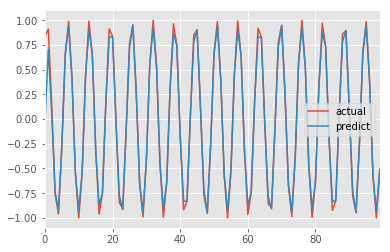

In [12]:
res.plot()

In [13]:
x, y = g.batch()
y_ = m.m.predict(x, batch_size=1)
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

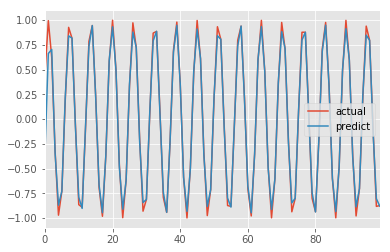

In [14]:
res.plot()

In [15]:
m.m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 1)           264       
_________________________________________________________________
reshape_1 (Reshape)          (None, 100, 1)            0         
Total params: 17,160
Trainable params: 17,160
Non-trainable params: 0
_________________________________________________________________


# See How Far It Can Run

In [16]:
figsize=(20, 5)

In [17]:
x, y = g.batch()

In [18]:
def gen_future(count):
    xs = []
    ys = []
    for _ in range(count):
        tx, ty = g.batch()
        xs += [i for i in tx.squeeze()]
        ys += [i for i in ty.squeeze()]
    return xs, ys

In [19]:
def pred_future(xs, count):
    timesteps = xs.shape[1]
    ys = []
    # Each time through this predict loop we get one future element
    for _ in range(count * timesteps):
        xs = m.m.predict(xs, batch_size=1)
        ys += [[i for i in xs.squeeze()][-1]]  # The last one is the only thing new
    return ys

In [20]:
fx, fy = gen_future(2)

In [21]:
pfy = pred_future(x, 2)

## Here is what this looks like:

###  Note that the blue values are all generated from the LSTM - none of these are coming from the generator

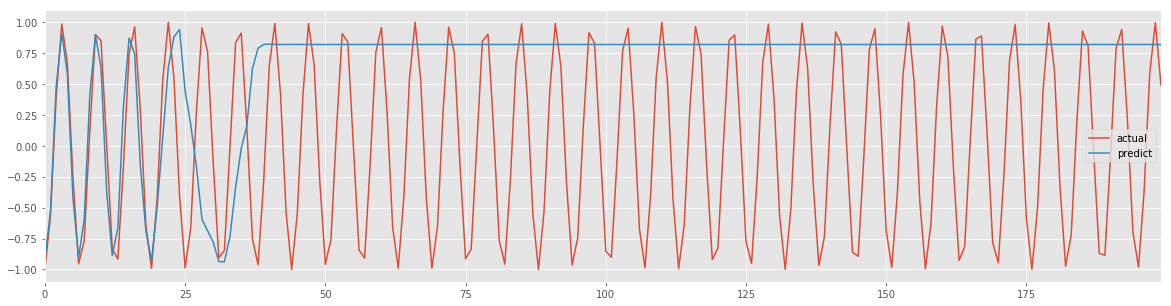

In [22]:
pd.DataFrame({'predict': pfy, 'actual': fx}).plot(figsize=figsize)

In [23]:
showpoints=10

In [24]:
pd.DataFrame({'predict y':pfy[:showpoints], 'gen x':fx[:showpoints]})

,gen x,predict y
0,-0.999756,-0.921318
1,-0.558764,-0.518879
2,0.395953,0.481337
3,0.986633,0.912156
4,0.670207,0.579775
5,-0.262404,-0.427807
6,-0.953762,-0.904110
7,-0.768235,-0.597262
8,0.123603,0.412885
9,0.901801,0.899781
